Q0: Write a python function that takes an X and Y vector and returns an estimated 𝛽0 and 𝛽1 from linear regression. Check your function versus one of the prewritten ones. Include this in code cells of your ipython notebook.

In [7]:
# linear regression function 
import numpy as np
from scipy import stats as st

def linear_regression(x, y):     
    x_mean = x.mean()
    y_mean = y.mean()
    # get the slope and intercept
    beta1 = st.pearsonr(x, y)[0] * np.std(y) / np.std(x) # slope
    #B1 = (((x - x_mean) * (y - y_mean)).sum()) / (((x - x_mean)**2).sum()) # slope
    beta0 = y_mean - (beta1*x_mean) # intercept
    return (beta0, beta1)

# Check the function versus a prewritten one
x = np.random.rand(30,)
y = np.random.rand(30,)
# my function
B0 = linear_regression(x, y)[0]
B1 = linear_regression(x, y)[1]
print('β0 = {}, β1 = {}'.format(B0, B1))
# prewritten function
print(st.linregress(x, y))

β0 = 0.42751609335253626, β1 = 0.052428648220510084
LinregressResult(slope=0.052428648220510084, intercept=0.42751609335253626, rvalue=0.053105030149974114, pvalue=0.7804709338487028, stderr=0.18631195940979203, intercept_stderr=0.11452829283906771)


--------------------------------------------------------------------------------------
Q1: Using Python and basic numpy functions, fit a linear regression model to the kirby 21 dataset into colab for the left telencelphalon (predictor) to the right telencephalon (outcome). Also, do the same reversing the predictor and response relationship. Do a scatterplot of the left telencephalon (type 1 level 1) volume by the right. Do not hold out any data (there's only 21 observations).

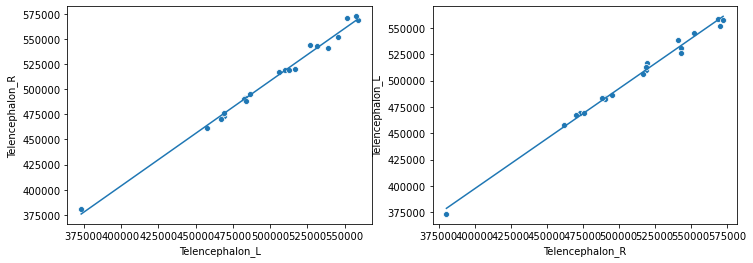

In [6]:
import pandas as pd
from scipy import stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# get the Kirb21 data
df = pd.read_csv('https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv')
tel_l = df.loc[(df.roi == 'Telencephalon_L')].volume.reset_index(drop=True)
tel_r = df.loc[(df.roi == 'Telencephalon_R')].volume.reset_index(drop=True)
data = pd.DataFrame({'Telencephalon_L':tel_l, 'Telencephalon_R': tel_r})

# scenario 1: left telencelphalon (predictor), right telencephalon (outcome)
# get the slope and intercept
x = data['Telencephalon_L']
y = data['Telencephalon_R']
beta1 = st.pearsonr(x, y)[0] * np.std(y) / np.std(x)
beta0 = np.mean(y) - np.mean(x) * beta1
# scatterplot with line
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(x, beta0 + beta1 * x, ax=ax[0])
sns.scatterplot(x, y, ax=ax[0])

# scenario 2: right telencelphalon (predictor), left telencephalon (outcome)
# get the slope and intercept
x = data['Telencephalon_R']
y = data['Telencephalon_L']
beta1 = st.pearsonr(x, y)[0] * np.std(y) / np.std(x)
beta0 = np.mean(y) - np.mean(x) * beta1
# scatterplot with line
sns.lineplot(x, beta0 + beta1 * x, ax=ax[1])
sns.scatterplot(x, y, ax=ax[1])

--------------------------------------------------------------------------------------
Q2: Consider a regression through the origin model Y=BX . What would be the impact on the estimate of B if we replaced X by cX where c is a positive constant? Write your answer in a markdown cell of your ipython notebook.

Answer: In this case, the new slope (B') is equal to the previous value (B) divided by the positive constant c.

--------------------------------------------------------------------------------------
Q3: Let  $X_i$  be a group indicator so that $x_i=I(i\in G_1)$ 
I.e. takes the value  1  when  $i$  is in group 1 and 0 if  i  is in group 0. Consider optimizing $\sum_i \frac{1}{n}(Y_i − \beta_0 - \beta_1 X_i)^2$. 
If $\hat Y = \hat \beta_0 + \hat \beta_1 X$, argue that $\hat Y$ is the group mean for group 1 if $X=1$ and the group mean for group 0 if $X=0$. You can either make a text argument in a markdown cell, or create a simulated example and show that the results holds.

Answer:
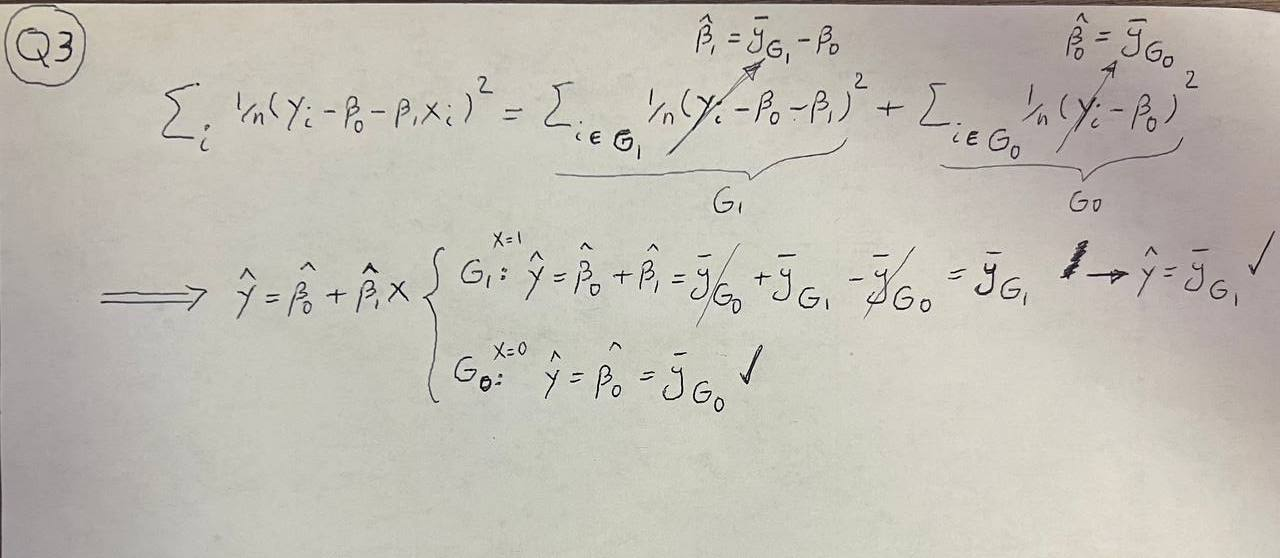

--------------------------------------------------------------------------------------
Q4: Argue that if you take the vectors $Y$ and $X$ and divide them by their standard deviations (respectively), the slope for either regressing $Y$ on $X$ or $X$ on $Y$ is simply the correlation.

Answer:
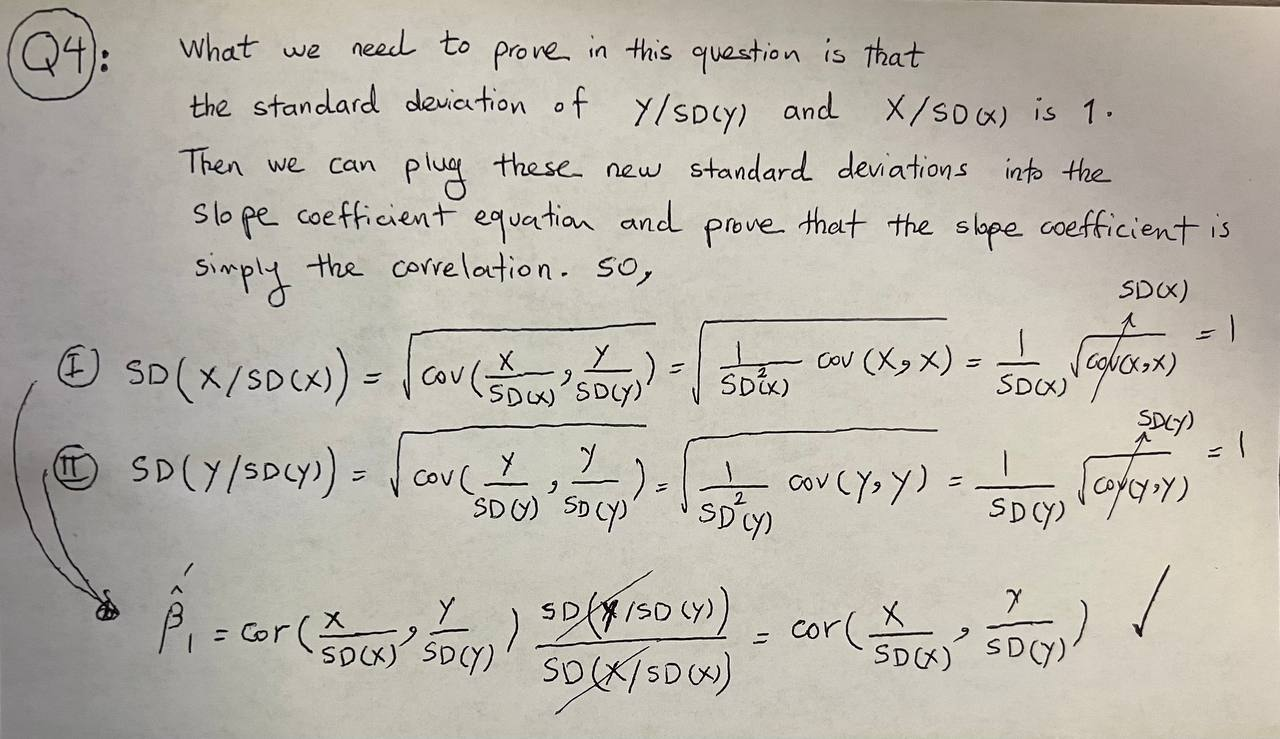